In [6]:
pip --version

pip 23.2.1 from C:\ProgramData\anaconda3\Lib\site-packages\pip (python 3.11)

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
import tensorflow as tf

In [9]:
tf.__version__

'2.15.0'

In [10]:
print(tf.__version__)

2.15.0


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

In [13]:
img_size = (160, 160)
batch_size = 30

In [14]:
train_directory = "train"
val_directory = "val"
test_directory = "test"

In [16]:
train_dataset = image_dataset_from_directory(
    train_directory,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    label_mode="binary"
)

Found 5216 files belonging to 2 classes.


In [17]:
val_dataset = image_dataset_from_directory(
    val_directory,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary"
)

Found 16 files belonging to 2 classes.


In [18]:
test_dataset = image_dataset_from_directory(
    test_directory,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary"
)

Found 624 files belonging to 2 classes.


In [19]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(160, 160, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
epochs = 15
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=val_dataset,
)

Epoch 1/15


174/174 [==============================] - 50s 281ms/step - loss: 1.6336 - accuracy: 0.8574 - val_loss: 0.3345 - val_accuracy: 0.8125
Epoch 2/15
174/174 [==============================] - 47s 265ms/step - loss: 0.1269 - accuracy: 0.9519 - val_loss: 0.1049 - val_accuracy: 0.9375
Epoch 3/15
174/174 [==============================] - 48s 276ms/step - loss: 0.0924 - accuracy: 0.9643 - val_loss: 0.0800 - val_accuracy: 1.0000
Epoch 4/15
174/174 [==============================] - 49s 281ms/step - loss: 0.0799 - accuracy: 0.9701 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 5/15
174/174 [==============================] - 49s 281ms/step - loss: 0.0967 - accuracy: 0.9649 - val_loss: 0.1158 - val_accuracy: 0.9375
Epoch 6/15
174/174 [==============================] - 50s 285ms/step - loss: 0.0834 - accuracy: 0.9703 - val_loss: 0.1003 - val_accuracy: 0.9375
Epoch 7/15
174/174 [==============================] - 648s 4s/step - loss: 0.0554 - accuracy: 0.9781 - val_loss: 0.0075 - val_ac

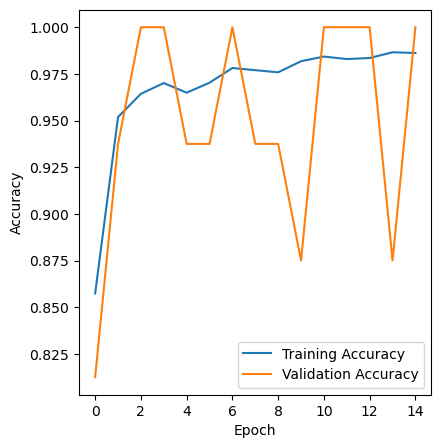

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

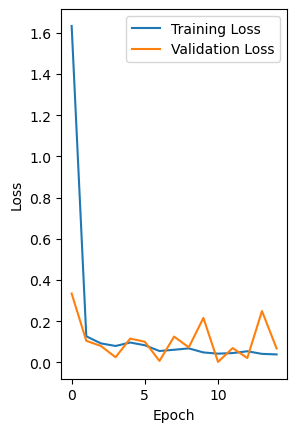

In [23]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
eval_result = model.evaluate(test_dataset)
print("Test Accuracy:", eval_result[1])

21/21 [==============================] - 2s 74ms/step - loss: 2.3805 - accuracy: 0.7516
Test Accuracy: 0.7516025900840759
